# Fertility Rate and Life Expectancy Analysis Across Time

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import imageio

### 1. Read file

In [2]:
df=pd.read_csv('./data/gapminder_total.csv', index_col=0)
df


,country,year,life_expectancy,continent,population,fertility
0,Afghanistan,1950,26.85,Asia,7752118.0,7.67
1,Afghanistan,1951,27.13,Asia,7839426.0,7.67
2,Afghanistan,1952,27.67,Asia,7934798.0,7.67
3,Afghanistan,1953,28.19,Asia,8038312.0,7.67
4,Afghanistan,1954,28.73,Asia,8150037.0,7.67
...,...,...,...,...,...,...
11083,Zimbabwe,2011,51.60,Africa,14255592.0,3.64
11084,Zimbabwe,2012,54.20,Africa,14565482.0,3.56
11085,Zimbabwe,2013,55.70,Africa,14898092.0,3.49
11086,Zimbabwe,2014,57.00,Africa,15245855.0,3.41


In [3]:
df_subset= df[df['year']==1995]
df_subset.head()

,country,year,life_expectancy,continent,population,fertility
45,Afghanistan,1995,49.4,Asia,16772522.0,7.83
111,Albania,1995,73.7,Europe,3106727.0,2.72
177,Algeria,1995,71.6,Africa,28904300.0,3.45
243,Angola,1995,50.9,Africa,13042666.0,7.02
309,Antigua and Barbuda,1995,73.5,North America,68349.0,2.21


Text(3807    76.6
Name: life_expectancy, dtype: float64, 3807    1.51
Name: fertility, dtype: float64, 'Germany')

/opt/anaconda3/envs/spiced_python3.11/lib/python3.11/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/opt/anaconda3/envs/spiced_python3.11/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/opt/anaconda3/envs/spiced_python3.11/lib/python3.11/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/opt/anaconda3/envs/spiced_python3.11/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a T

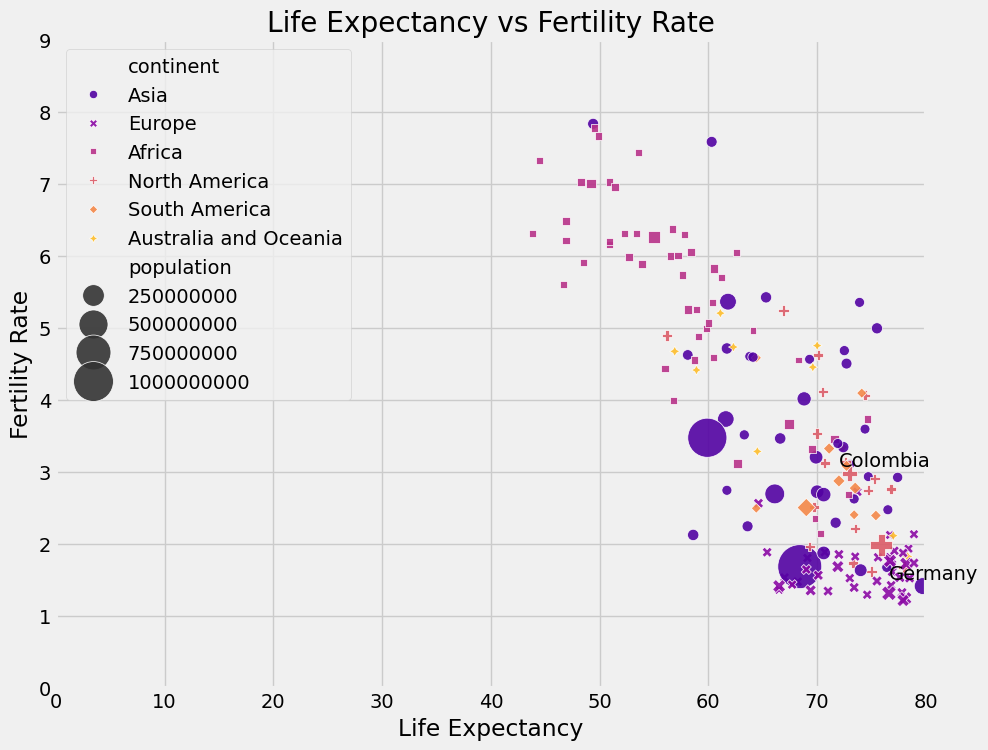

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))

sns.scatterplot(x='life_expectancy', y='fertility', data=df_subset, hue='continent', style='continent', size='population', sizes= (50, 1000),
                palette='plasma', alpha=0.9, )
plt.title('Life Expectancy vs Fertility Rate')
plt.ylabel('Fertility Rate')
plt.xlabel('Life Expectancy')
plt.legend( loc='upper left')
plt.axis([0, 80, 0, 9])

plt.annotate('Colombia',(df_subset[df_subset['country']=='Colombia']['life_expectancy'],df_subset[df_subset['country']=='Colombia']['fertility']+0.20))
plt.annotate('Germany',(df_subset[df_subset['country']=='Germany']['life_expectancy'],df_subset[df_subset['country']=='Germany']['fertility']+0.20))

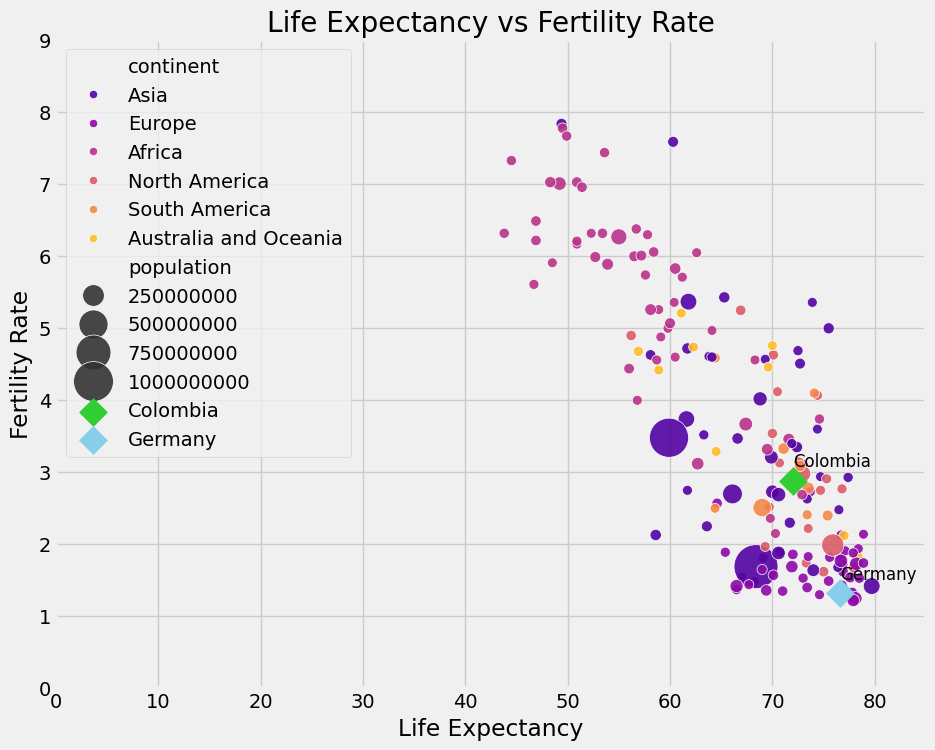

In [19]:


plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))

# Main scatter plot
sns.scatterplot(
    x='life_expectancy', y='fertility', data=df_subset[df_subset['country'].isin(['Colombia', 'Germany']) == False], 
    hue='continent', size='population', sizes=(50, 1000), palette='plasma', alpha=0.9
)

# Custom marker for Colombia
colombia_data = df_subset[df_subset['country'] == 'Colombia']
plt.scatter(colombia_data['life_expectancy'], colombia_data['fertility'], color='limegreen', s=200, marker='D', label='Colombia')

# Custom marker for Germany
germany_data = df_subset[df_subset['country'] == 'Germany']
plt.scatter(germany_data['life_expectancy'], germany_data['fertility'], color='skyblue', s=200, marker='D', label='Germany')

# Annotations
plt.annotate('Colombia', (colombia_data['life_expectancy'].values[0], colombia_data['fertility'].values[0] + 0.20), fontsize=12)
plt.annotate('Germany', (germany_data['life_expectancy'].values[0], germany_data['fertility'].values[0] + 0.20), fontsize=12)

# Plot settings
plt.title('Life Expectancy vs Fertility Rate')
plt.ylabel('Fertility Rate')
plt.xlabel('Life Expectancy')
plt.legend(loc='upper left')
plt.axis([0, 85, 0, 9])

plt.show()


In [20]:
path = './plots/plots_for_animation'

### 2. Write a for loop that goes through each year

In [21]:
for year in range (1960,2016):
    df_year= df.loc[df['year']==year]
    plt.figure(figsize=(9,8))
    
    sns.scatterplot(x='life_expectancy', y='fertility', data=df_year, hue='continent', size='population', sizes= (50, 1000),
                palette='plasma', alpha=0.8)
    plt.title(f'Life Expectancy vs Fertility Rate {year}')
    plt.ylabel('Fertility Rate')
    plt.xlabel('Life Expectancy')
    plt.legend(loc='upper left')
    plt.axis([0, 85, 0, 9.5])
    plt.annotate('Colombia',(df_year[df_year['country']=='Colombia']['life_expectancy'],df_year[df_year['country']=='Colombia']['fertility']+0.20),weight='bold')
    plt.annotate('Germany',(df_year[df_year['country']=='Germany']['life_expectancy'],df_year[df_year['country']=='Germany']['fertility']+0.20),weight='bold')
    plt.savefig(f'./plots/plot_{year}_visualization.png')
    plt.close()

/opt/anaconda3/envs/spiced_python3.11/lib/python3.11/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/opt/anaconda3/envs/spiced_python3.11/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/opt/anaconda3/envs/spiced_python3.11/lib/python3.11/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/opt/anaconda3/envs/spiced_python3.11/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a T

In [22]:

images = []

for year in range(1960,2016):
    filename = f'./plots/plot_{year}_visualization.png'
    images.append(imageio.imread(filename))

imageio.mimsave('./years_corr.gif', images, fps=100)


/var/folders/xq/xl6fm5356nj9dmz14z91xtz40000gn/T/ipykernel_3244/3228599506.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
